In [1]:
import warnings
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

In [2]:
%%capture
%%R
library(circlize)
library(ape)
library(phangorn)
library(spiralize)
suppressPackageStartupMessages(library(dendextend))

R[write to console]: Note: 1 point is out of plotting region in sector 'a', track '1'.

R[write to console]: Note: 1 point is out of plotting region in sector 'b', track '1'.

R[write to console]: Note: 1 point is out of plotting region in sector 'c', track '1'.

R[write to console]: Note: 1 point is out of plotting region in sector 'd', track '1'.

R[write to console]: Note: 1 point is out of plotting region in sector 'e', track '1'.

R[write to console]: Note: 1 point is out of plotting region in sector 'f', track '1'.

R[write to console]: Note: 1 point is out of plotting region in sector 'g', track '1'.

R[write to console]: Note: 1 point is out of plotting region in sector 'h', track '1'.



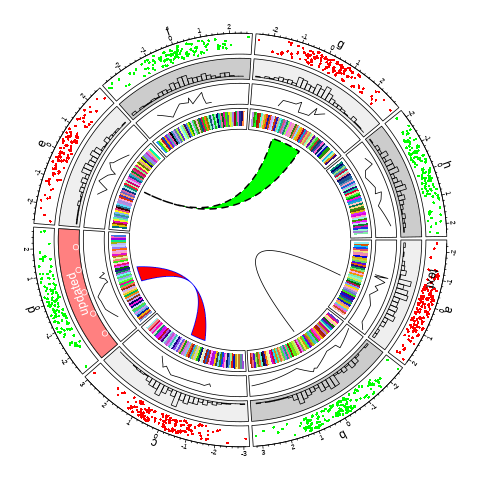

In [3]:
%%R
# generate random data
set.seed(999)
n = 1000
df = data.frame(sectors = sample(letters[1:8], n, replace = TRUE),
    x = rnorm(n), y = runif(n))

circos.par("track.height" = 0.1)
circos.initialize(df$sectors, x = df$x)

circos.track(df$sectors, y = df$y,
    panel.fun = function(x, y) {
        circos.text(CELL_META$xcenter, 
            CELL_META$cell.ylim[2] + mm_y(5), 
            CELL_META$sector.index)
        circos.axis(labels.cex = 0.6)
})
col = rep(c("#FF0000", "#00FF00"), 4)
circos.trackPoints(df$sectors, df$x, df$y, col = col, pch = 16, cex = 0.5)
circos.text(-1, 0.5, "text", sector.index = "a", track.index = 1)

bgcol = rep(c("#EFEFEF", "#CCCCCC"), 4)
circos.trackHist(df$sectors, df$x, bin.size = 0.2, bg.col = bgcol, col = NA)

circos.track(df$sectors, x = df$x, y = df$y,
    panel.fun = function(x, y) {
        ind = sample(length(x), 10)
        x2 = x[ind]
        y2 = y[ind]
        od = order(x2)
        circos.lines(x2[od], y2[od])
})

circos.update(sector.index = "d", track.index = 2, 
    bg.col = "#FF8080", bg.border = "black")
circos.points(x = -2:2, y = rep(0.5, 5), col = "white")
circos.text(CELL_META$xcenter, CELL_META$ycenter, "updated", col = "white")

circos.track(ylim = c(0, 1), panel.fun = function(x, y) {
    xlim = CELL_META$xlim
    ylim = CELL_META$ylim
    breaks = seq(xlim[1], xlim[2], by = 0.1)
    n_breaks = length(breaks)
    circos.rect(breaks[-n_breaks], rep(ylim[1], n_breaks - 1),
                breaks[-1], rep(ylim[2], n_breaks - 1),
                col = rand_color(n_breaks), border = NA)
})

circos.link("a", 0, "b", 0, h = 0.4)
circos.link("c", c(-0.5, 0.5), "d", c(-0.5,0.5), col = "red",
    border = "blue", h = 0.2)
circos.link("e", 0, "g", c(-1,1), col = "green", border = "black", lwd = 2, lty = 2)
circos.clear()

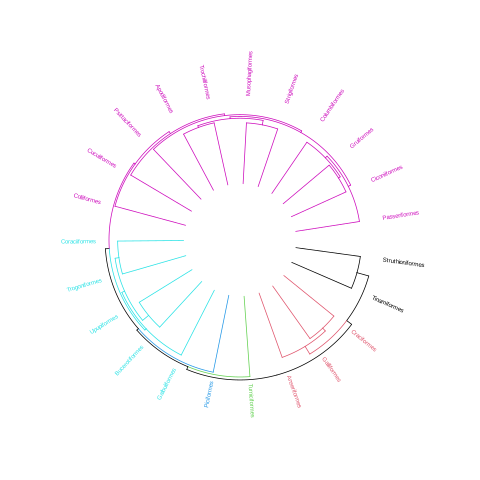

In [4]:
%%R
data(bird.orders)
hc = as.hclust(bird.orders)
labels = hc$labels  # name of birds
ct = cutree(hc, 6)  # cut tree into 6 pieces
n = length(labels)  # number of bird species
dend = as.dendrogram(hc)
circos.par(cell.padding = c(0, 0, 0, 0))
circos.initialize("a", xlim = c(0, n)) # only one sector
circos.track(ylim = c(0, 1), bg.border = NA, track.height = 0.3, 
    panel.fun = function(x, y) {
        for(i in seq_len(n)) {
            circos.text(i-0.5, 0, labels[i], adj = c(0, 0.5), 
                facing = "clockwise", niceFacing = TRUE,
                col = ct[labels[i]], cex = 0.5)
        }
})


dend = color_branches(dend, k = 6, col = 1:6)
dend_height = attr(dend, "height")
circos.track(ylim = c(0, dend_height), bg.border = NA, 
    track.height = 0.4, panel.fun = function(x, y) {
        circos.dendrogram(dend, facing = "inside")
})

circos.clear()

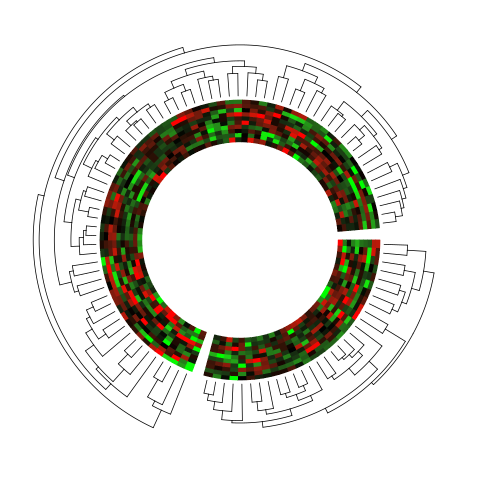

In [5]:
%%R
mat = matrix(rnorm(100*10), nrow = 100, ncol = 10)
col_fun = colorRamp2(c(-2, 0, 2), c("green", "black", "red"))
sectors = rep(letters[1:2], times = c(30, 70))
mat_list = list(a = mat[sectors == "a", ],
                b = mat[sectors == "b", ])
dend_list = list(a = as.dendrogram(hclust(dist(mat_list[["a"]]))),
                 b = as.dendrogram(hclust(dist(mat_list[["b"]]))))

circos.par(cell.padding = c(0, 0, 0, 0), gap.degree = 5)
circos.initialize(sectors, xlim = cbind(c(0, 0), table(sectors)))

max_height = max(sapply(dend_list, function(x) attr(x, "height")))
circos.track(ylim = c(0, max_height), bg.border = NA, track.height = 0.3, 
    panel.fun = function(x, y) {
        sector.index = get.cell.meta.data("sector.index")
        dend = dend_list[[sector.index]]
        circos.dendrogram(dend, max_height = max_height, facing = "inside")
})

circos.track(ylim = c(0, 10), bg.border = NA, panel.fun = function(x, y) {
    sector.index = CELL_META$sector.index
    m = mat_list[[sector.index]]
    dend = dend_list[[sector.index]]

    m2 = m[order.dendrogram(dend), ]
    col_mat = col_fun(m2)
    nr = nrow(m2)
    nc = ncol(m2)
    for(i in 1:nc) {
        circos.rect(1:nr - 1, rep(nc - i, nr), 
            1:nr, rep(nc - i + 1, nr), 
            border = col_mat[, i], col = col_mat[, i])
    }
})
circos.clear()

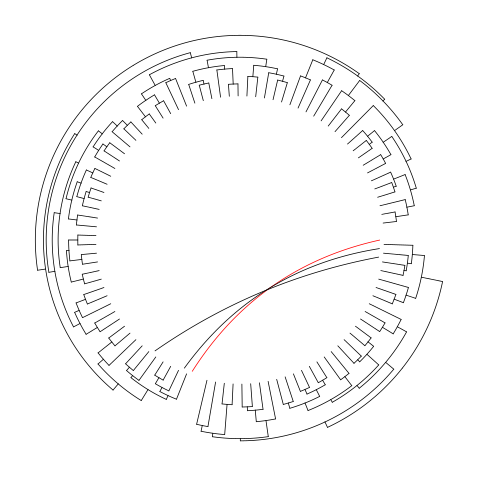

In [6]:
%%R
mat = matrix(rnorm(100*10), nrow = 100, ncol = 10)
col_fun = colorRamp2(c(-2, 0, 2), c("green", "black", "red"))
sectors = rep(letters[1:2], times = c(30, 70))
mat_list = list(a = mat[sectors == "a", ],
                b = mat[sectors == "b", ])
dend_list = list(a = as.dendrogram(hclust(dist(mat_list[["a"]]))),
                 b = as.dendrogram(hclust(dist(mat_list[["b"]]))))

circos.par(cell.padding = c(0, 0, 0, 0), gap.degree = 5)
circos.initialize(sectors, xlim = cbind(c(0, 0), table(sectors)))

max_height = max(sapply(dend_list, function(x) attr(x, "height")))
circos.track(ylim = c(0, max_height), bg.border = NA, track.height = 0.3, 
    panel.fun = function(x, y) {
        sector.index = get.cell.meta.data("sector.index")
        dend = dend_list[[sector.index]]
        circos.dendrogram(dend, max_height = max_height, facing = "inside")
})

circos.link("a", 0, "b", 0, h = 0.4, col="red")
circos.link("a", 1, "b", 1, h = 0.4)
circos.link("a", 2, "b", 5, h = 0.4)


circos.clear()

  [1] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a"
 [19] "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "a" "b" "b" "b" "b" "b" "b"
 [37] "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b"
 [55] "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b"
 [73] "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b" "b"
 [91] "b" "b" "b" "b" "b" "b" "b" "b" "b" "b"


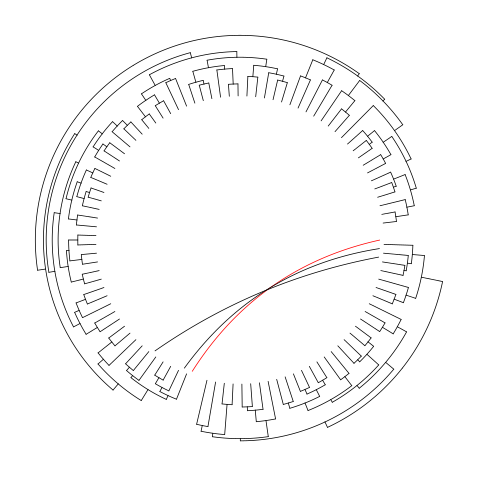

In [42]:
%%R
mat = matrix(rnorm(100*10), nrow = 100, ncol = 10)
col_fun = colorRamp2(c(-2, 0, 2), c("green", "black", "red"))
sectors = rep(letters[1:2], times = c(30, 70))

dend_list = list(a = as.dendrogram(hclust(dist(mat_list[["a"]]))),
                 b = as.dendrogram(hclust(dist(mat_list[["b"]]))))

circos.par(cell.padding = c(0, 0, 0, 0), gap.degree = 5)
circos.initialize(sectors, xlim = cbind(c(0, 0), table(sectors)))

max_height = max(sapply(dend_list, function(x) attr(x, "height")))
circos.track(ylim = c(0, max_height), bg.border = NA, track.height = 0.3, 
    panel.fun = function(x, y) {
        sector.index = get.cell.meta.data("sector.index")
        dend = dend_list[[sector.index]]
        circos.dendrogram(dend, max_height = max_height, facing = "inside")
})

circos.link("a", 0, "b", 0, h = 0.4, col="red")
circos.link("a", 1, "b", 1, h = 0.4)
circos.link("a", 2, "b", 5, h = 0.4)


circos.clear()
sectors

In [47]:
%%R
circos.clear()
tree_genome <- read.tree("/home/azureuser/datadrive/saccharopolyspora_dataset/data/processed/Staphylobactin_bigfam/automlst_wrapper/final_corrected.newick")

# midpoint root
tree_genome <- phangorn::midpoint(tree_genome)
tree_genome <- ladderize(reorder(tree_genome))
tree_genome_dendrogram <- phylo_to_dendrogram(tree_genome)

# preprocess bgc tree
tree_bgc <- read.tree("/home/azureuser/datadrive/saccharopolyspora_dataset/data/processed/Staphylobactin_bigfam_bgc_filtered/notebooks/assets/data/bgc_tree_with_genome_id.tree")
# midpoint root
tree_bgc <- phangorn::midpoint(tree_bgc)
tree_bgc <- ladderize(reorder(tree_bgc))
tree_bgc_dendrogram <- phylo_to_dendrogram(tree_bgc)

sectors <- c(rep("a", length(tree_genome$tip.label)), 
             rep("b", length(tree_bgc$tip.label)))
dend_list = list(a = tree_genome_dendrogram,
                 b = tree_bgc_dendrogram)



max_height = max(sapply(dend_list, function(x) attr(x, "height")))

circos.par(cell.padding = c(0, 0, 0, 0), gap.degree = 5)
circos.initialize(sectors, xlim = cbind(c(0, 0), table(sectors)))

circos.track(ylim = c(0, max_height), bg.border = NA, track.height = 0.3, 
    panel.fun = function(x, y) {
        sector.index = get.cell.meta.data("sector.index")
        dend = dend_list[[sector.index]]
        circos.dendrogram(dend, max_height = max_height, facing = "inside")
})

circos.clear()

R[write to console]: Error in xl[i] <- attr(dend[[i]], "midpoint") + x[as.character(labels(dend[[i]]))[1]] : 
  replacement has length zero




Error in xl[i] <- attr(dend[[i]], "midpoint") + x[as.character(labels(dend[[i]]))[1]] : 
  replacement has length zero


RInterpreterError: Failed to parse and evaluate line 'circos.clear()\ntree_genome <- read.tree("/home/azureuser/datadrive/saccharopolyspora_dataset/data/processed/Staphylobactin_bigfam/automlst_wrapper/final_corrected.newick")\n\n# midpoint root\ntree_genome <- phangorn::midpoint(tree_genome)\ntree_genome <- ladderize(reorder(tree_genome))\ntree_genome_dendrogram <- phylo_to_dendrogram(tree_genome)\n\n# preprocess bgc tree\ntree_bgc <- read.tree("/home/azureuser/datadrive/saccharopolyspora_dataset/data/processed/Staphylobactin_bigfam_bgc_filtered/notebooks/assets/data/bgc_tree_with_genome_id.tree")\n# midpoint root\ntree_bgc <- phangorn::midpoint(tree_bgc)\ntree_bgc <- ladderize(reorder(tree_bgc))\ntree_bgc_dendrogram <- phylo_to_dendrogram(tree_bgc)\n\nsectors <- c(rep("a", length(tree_genome$tip.label)), \n             rep("b", length(tree_bgc$tip.label)))\ndend_list = list(a = tree_genome_dendrogram,\n                 b = tree_bgc_dendrogram)\n\n\n\nmax_height = max(sapply(dend_list, function(x) attr(x, "height")))\n\ncircos.par(cell.padding = c(0, 0, 0, 0), gap.degree = 5)\ncircos.initialize(sectors, xlim = cbind(c(0, 0), table(sectors)))\n\ncircos.track(ylim = c(0, max_height), bg.border = NA, track.height = 0.3, \n    panel.fun = function(x, y) {\n        sector.index = get.cell.meta.data("sector.index")\n        dend = dend_list[[sector.index]]\n        circos.dendrogram(dend, max_height = max_height, facing = "inside")\n})\n\ncircos.clear()\n'.
R error message: 'Error in xl[i] <- attr(dend[[i]], "midpoint") + x[as.character(labels(dend[[i]]))[1]] : \n  replacement has length zero'

In [55]:
%%R
circos.clear()
tree_genome <- read.tree("/home/azureuser/datadrive/saccharopolyspora_dataset/data/processed/Staphylobactin_bigfam/automlst_wrapper/final_corrected.newick")

# midpoint root
tree_genome <- phangorn::midpoint(tree_genome)
tree_genome <- ladderize(reorder(tree_genome))
tree_genome_dendrogram <- phylo_to_dendrogram(tree_genome)

dend = tree_genome_dendrogram
dend_height = attr(dend, "height")

circos.par(cell.padding = c(0, 0, 0, 0))
circos.initialize("a", xlim = c(0, n)) # only one sector


circos.clear()
dend

'dendrogram' with 2 branches and 114 members total, at height 0.6196775 


In [ ]:
circos.track(ylim = c(0, max_height), bg.border = NA, track.height = 0.3, 
    panel.fun = function(x, y) {
        sector.index = get.cell.meta.data("sector.index")
        dend = dend_list[[sector.index]]
        circos.dendrogram(dend, max_height = max_height, facing = "inside")
})

In [ ]:
%%R








circos.track(ylim = c(0, max_height), bg.border = NA, track.height = 0.3, 
    panel.fun = function(x, y) {
        sector.index = get.cell.meta.data("sector.index")
        dend = dend_list[[sector.index]]
        circos.dendrogram(dend, max_height = max_height, facing = "inside")
})

circos.clear()
sectors